In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re

ldst = list()

class LdSt:
    def __init__(self, line):
        match = re.fullmatch(r"([ls])([bhwd])(u?) ([a-z0-9]+),(-?[0-9]+)\(([a-z0-9]+)\)", line.strip())
        assert match
        self.insn = match.group(1)+match.group(2)+match.group(3)
        self.ldst = match.group(1)
        self.width = match.group(2)
        self.sext = "u" if match.group(3) == "u" else "s"
        self.dreg = match.group(4)
        self.preg = match.group(6)
        self.off = int(match.group(5))
    
    def __str__(self):
        return "<%s %s %s %s %s %d>" % (self.ldst, self.width, self.sext, self.dreg, self.preg, self.off)

with open("ldst.txt") as f:
    for line in f:
        ldst.append(LdSt(line))

print("Number of load/store instruction in database: %d" % len(ldst))

Number of load/store instruction in database: 1552528


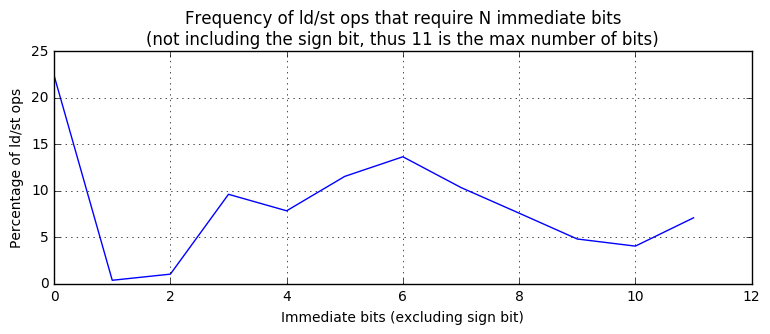

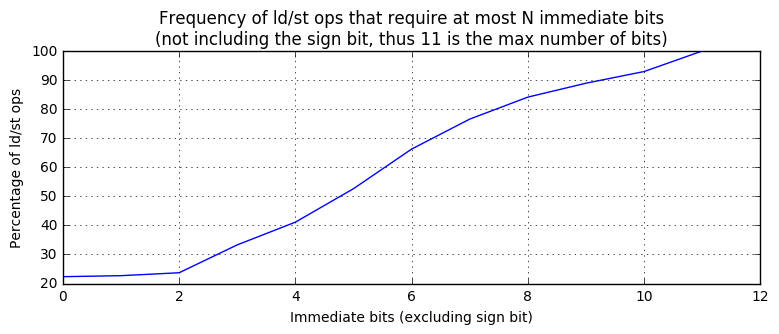

In [2]:
offbits = np.zeros(12, np.int)

for entry in ldst:
    i = 0 if entry.off == 0 else int(np.ceil(np.log2(abs(entry.off))))
    offbits[i] += 1

plt.figure(figsize=(9, 3))
plt.title("Frequency of ld/st ops that require N immediate bits\n" +
          "(not including the sign bit, thus 11 is the max number of bits)")
plt.plot(100 * offbits / np.sum(offbits))
plt.xlabel("Immediate bits (excluding sign bit)")
plt.ylabel("Percentage of ld/st ops")
plt.grid()

plt.figure(figsize=(9, 3))
plt.title("Frequency of ld/st ops that require at most N immediate bits\n" +
          "(not including the sign bit, thus 11 is the max number of bits)")
plt.plot(100 * np.cumsum(offbits) / np.sum(offbits))
plt.xlabel("Immediate bits (excluding sign bit)")
plt.ylabel("Percentage of ld/st ops")
plt.grid()

In [3]:
ldcnt = 0
stcnt = 0

ldspcnt = 0
stspcnt = 0

for entry in ldst:
    if entry.ldst == "l":
        ldcnt += 1
        ldspcnt += 1 if entry.preg == "sp" else 0
    else:
        stcnt += 1
        stspcnt += 1 if entry.preg == "sp" else 0

print("Number of loads in database: %d" % ldcnt)
print("Number of stores in database: %d" % stcnt)

print("Percentage of loads that use sp:  %2d %%" % (100*ldspcnt/ldcnt))
print("Percentage of stores that use sp: %2d %%" % (100*stspcnt/stcnt))

Number of loads in database: 1011148
Number of stores in database: 541380
Percentage of loads that use sp:  38 %
Percentage of stores that use sp: 64 %


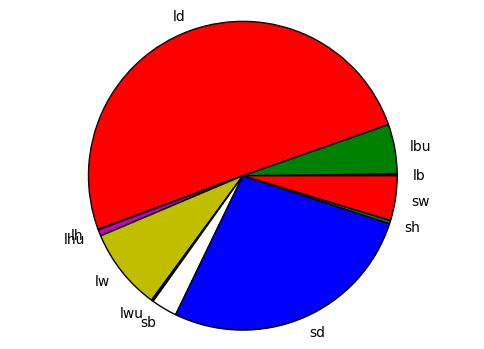

Combined LD+SD+LW+SW+LB+LBU+SB percentage: 98 %


In [4]:
insnfreq = dict()

for entry in ldst:
    if entry.insn not in insnfreq:
        insnfreq[entry.insn] = 0
    insnfreq[entry.insn] += 1

labels = list()
sizes = list()

for l, s in sorted(insnfreq.items()):
    labels.append(l)
    sizes.append(s)

plt.pie(sizes, labels=labels)
# plt.title("Relative frequency of ld/st")
plt.axis('equal')
plt.show()

print("Combined LD+SD+LW+SW+LB+LBU+SB percentage: %d %%" % (100*(insnfreq["ld"] + insnfreq["sd"] +
      insnfreq["lw"] + insnfreq["sw"] + insnfreq["lb"] + insnfreq["lbu"] + insnfreq["sb"]) / sum(insnfreq.values())))

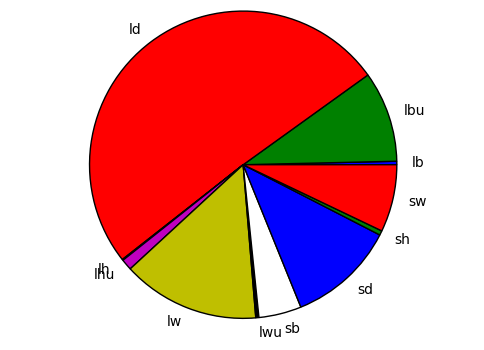

Combined LD+SD+LW+SW+LB+LBU+SB percentage: 97 %


In [5]:
insnfreq = dict()

for entry in ldst:
    if entry.preg == "sp":
        continue
    if entry.insn not in insnfreq:
        insnfreq[entry.insn] = 0
    insnfreq[entry.insn] += 1

labels = list()
sizes = list()

for l, s in sorted(insnfreq.items()):
    labels.append(l)
    sizes.append(s)

plt.pie(sizes, labels=labels)
# plt.title("Relative frequency of ld/st\n" +
#           "(excluding ld/st relative to sp)")
plt.axis('equal')
plt.show()

print("Combined LD+SD+LW+SW+LB+LBU+SB percentage: %d %%" % (100*(insnfreq["ld"] + insnfreq["sd"] +
      insnfreq["lw"] + insnfreq["sw"] + insnfreq["lb"] + insnfreq["lbu"] + insnfreq["sb"]) / sum(insnfreq.values())))